<a href="https://colab.research.google.com/github/phudo0605/AI/blob/main/HW7/Asteroid_MLP_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


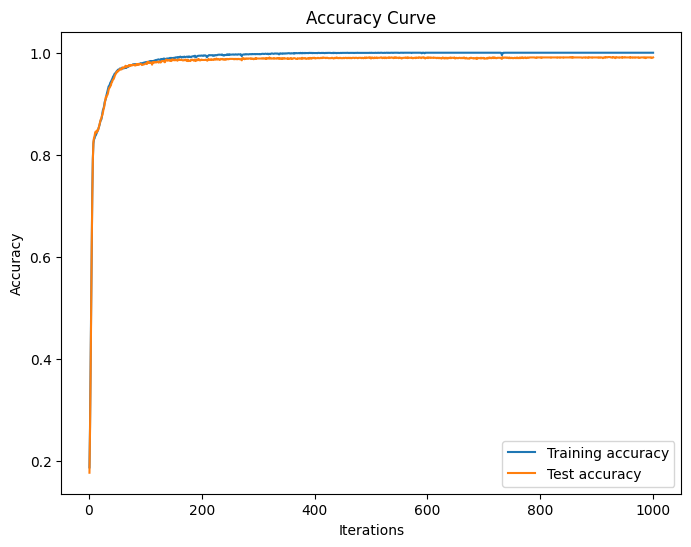

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler

# mount the google drive to access the csv data file
drive.mount('/content/drive')

# read the NASA asteroid dataset
asteroid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/nasa_asteroid.csv')

# remove some columns containing non-relevant features
# dataset X includes features related to classification of a hazardous or non-hazadous asteroid
# dataset y is the actual results of asteroid classification corresponding to X's features
# y is boolean data type (True: hazardous, False: no-hazarous)
X_dropped = ['Neo Reference ID', 'Name', 'Orbiting Body', 'Orbit ID', 'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date', 'Equinox', 'Hazardous']
X = asteroid.drop(X_dropped, axis=1)
y = asteroid['Hazardous']

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
# store the training and test accuracies
    train_accuracies.append(mlp.score(X_train, y_train))
    test_accuracies.append(mlp.score(X_test, y_test))

# # Plot the training and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()


# **The Loss Curve**
* The loss function measures the difference between the **predicted values** of the model and the **actual values** in the training dataset.

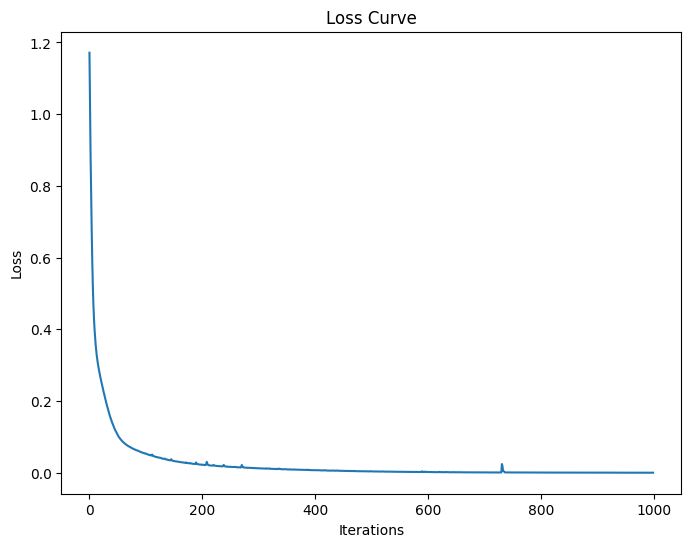

In [ ]:
#@title Display the loss curve of the model

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [ ]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9907604832977968


# **The Confusion Matrix**

* The confusion matrix is used for evaluating the performance of a classification model.

>* **True Positive** (TP): The number of observations that were correctly predicted as positive.
>* **False Positiv**e (FP): The number of observations that were incorrectly predicted as positive (actually negative).
>* **True Negative** (TN): The number of observations that were correctly predicted as negative.
>* **False Negative** (FN): The number of observations that were incorrectly predicted as negative (actually positive).

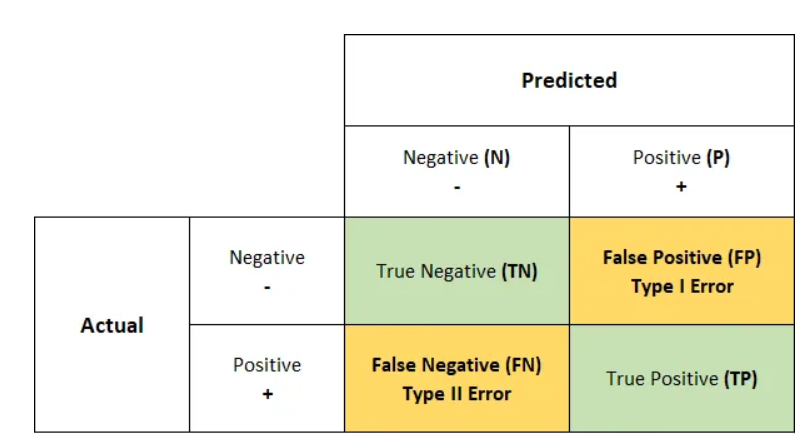

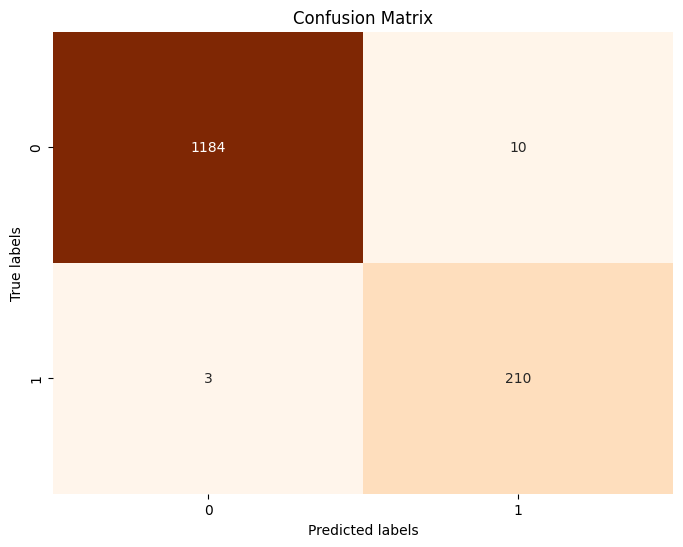

In [ ]:
#@title Display the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
